# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


In [3]:
df.shape

(900, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [6]:
df.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [7]:
df.Class.value_counts(normalize=True)

Kecimen   0.500
Besni     0.500
Name: Class, dtype: float64

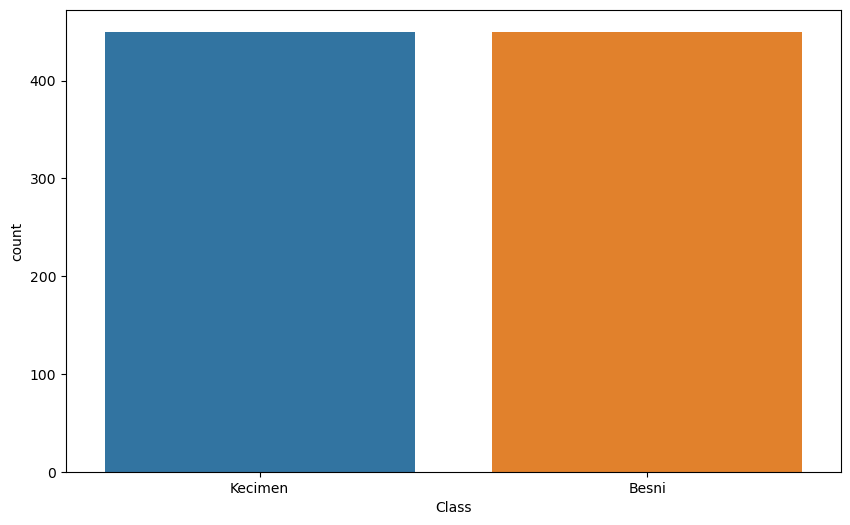

In [8]:
sns.countplot(data = df, x = "Class");

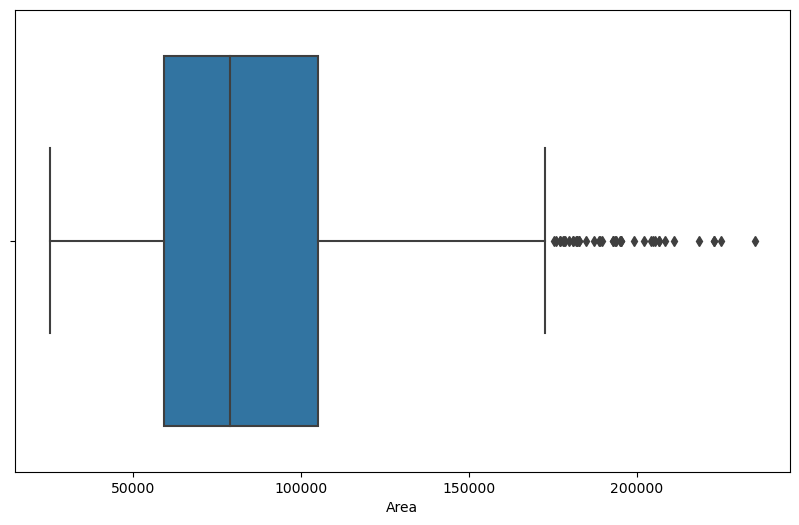

In [9]:
sns.boxplot(data =df, x="Area");

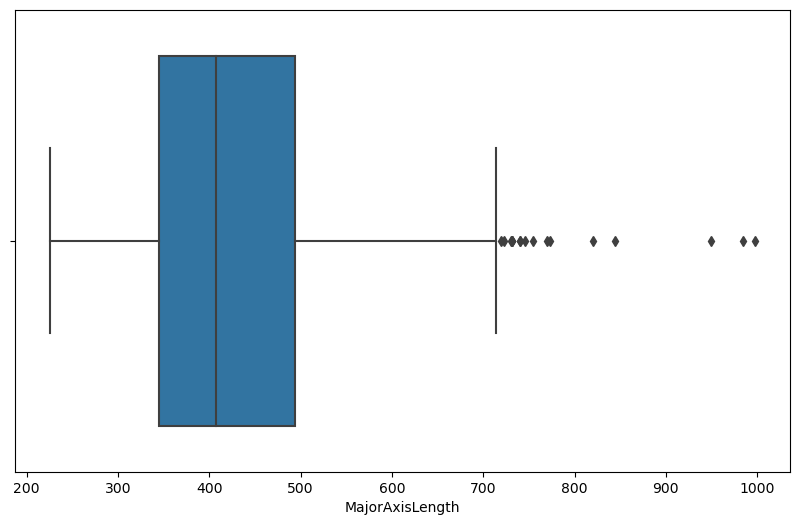

In [10]:
sns.boxplot(data =df, x='MajorAxisLength');

In [11]:
df[df['MajorAxisLength']>900]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
487,210923,984.045,367.280,0.928,278217,0.507,2697.753,Besni
506,182160,997.292,271.872,0.962,221527,0.380,2303.690,Besni
836,181126,949.663,293.387,0.951,225592,0.414,2352.029,Besni


In [12]:
df = df[df.MajorAxisLength<900]

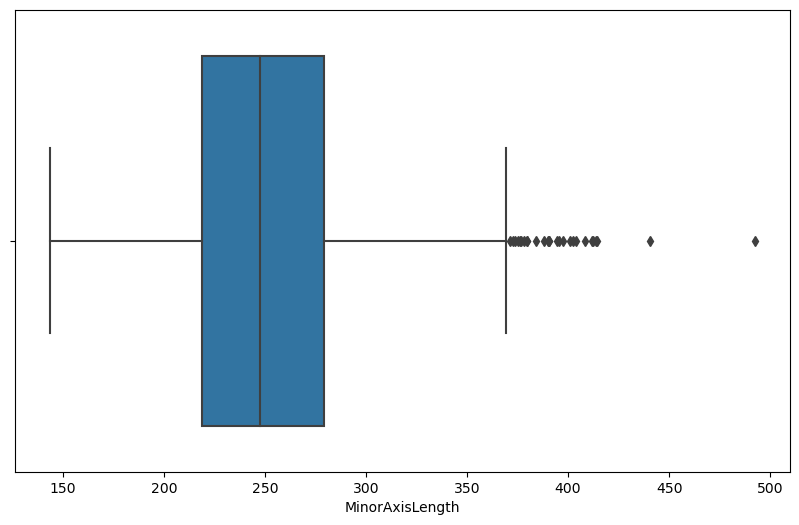

In [13]:
sns.boxplot(data =df, x='MinorAxisLength');

In [14]:
df[df.MinorAxisLength>425]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
552,204864,596.640,440.497,0.674,209457,0.751,1726.246,Besni
880,218459,571.289,492.275,0.507,228259,0.732,1947.460,Besni


In [15]:
df = df[df.MinorAxisLength<425]

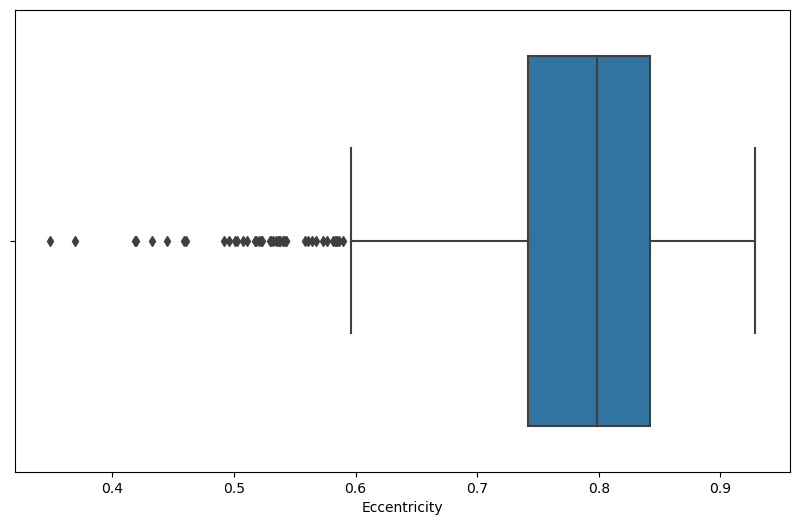

In [16]:
sns.boxplot(data =df, x='Eccentricity');

In [17]:
df[df.Eccentricity<0.5]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
23,61251,301.508,273.660,0.420,64732,0.644,971.769,Kecimen
34,46427,253.842,235.907,0.369,48275,0.684,844.312,Kecimen
43,92384,368.406,320.715,0.492,93772,0.749,1135.662,Kecimen
106,48945,269.370,239.162,0.460,51456,0.711,872.289,Kecimen
156,45962,251.133,235.368,0.349,47173,0.742,810.195,Kecimen
192,37569,232.428,208.152,0.445,38874,0.794,734.102,Kecimen
197,86545,350.128,315.720,0.432,87512,0.786,1070.062,Kecimen
251,45598,259.896,225.656,0.496,47266,0.741,813.276,Kecimen
316,55746,280.313,254.600,0.418,56989,0.731,875.659,Kecimen
356,58460,290.754,258.384,0.459,60254,0.775,908.357,Kecimen


In [18]:
df = df[df.Eccentricity>0.5]

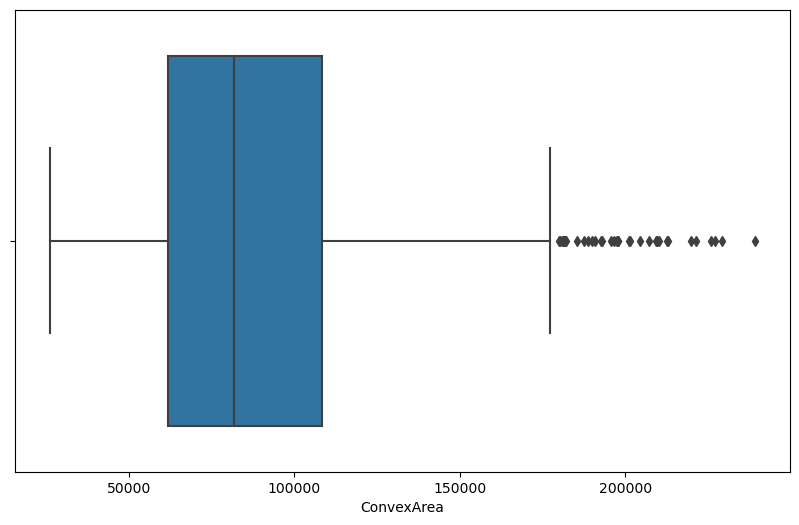

In [19]:
sns.boxplot(data =df, x='ConvexArea');

In [20]:
df[df.ConvexArea>220000]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
85,180898,843.957,323.191,0.924,221396,0.454,2253.557,Kecimen
708,222915,731.559,389.947,0.846,227170,0.771,1876.307,Besni
804,223075,694.248,411.810,0.805,225916,0.765,1812.569,Besni
812,235047,772.957,388.202,0.865,239093,0.712,1942.050,Besni
866,225043,740.004,390.301,0.850,229195,0.744,1853.893,Besni


In [21]:
df = df[df.ConvexArea<220000]

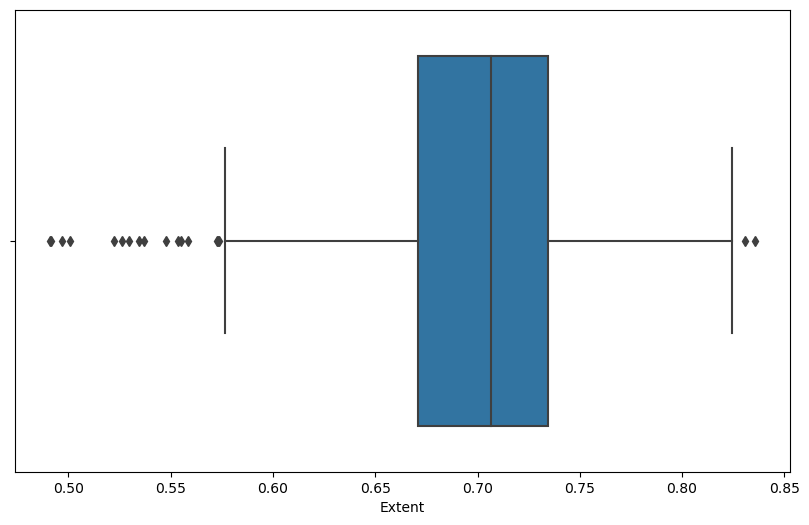

In [22]:
sns.boxplot(data =df, x='Extent');

In [23]:
df[df.Extent>0.82]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
47,41502,260.513,205.865,0.613,43114,0.824,790.427,Kecimen
113,50545,286.871,227.160,0.611,51771,0.835,847.664,Kecimen
463,45051,323.589,180.070,0.831,46532,0.831,836.625,Besni


In [24]:
df = df[df.Extent<0.82]

In [25]:
df[df.Extent<0.55]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
290,136340,722.854,311.341,0.902,176818,0.530,2098.263,Kecimen
459,83107,507.381,233.154,0.888,93706,0.491,1367.331,Besni
498,116406,612.665,251.833,0.912,125638,0.526,1480.951,Besni
536,81604,528.586,204.740,0.922,87172,0.491,1299.386,Besni
579,130868,613.173,273.182,0.895,134139,0.537,1513.352,Besni
600,89721,530.157,223.500,0.907,95252,0.547,1295.377,Besni
682,106923,591.116,234.823,0.918,111428,0.522,1425.109,Besni
694,172783,820.724,352.194,0.903,219952,0.497,2289.889,Besni
802,71502,490.433,189.443,0.922,75157,0.501,1182.852,Besni
829,127292,639.851,258.382,0.915,129101,0.535,1496.062,Besni


In [26]:
df =df[df.Extent>0.55]

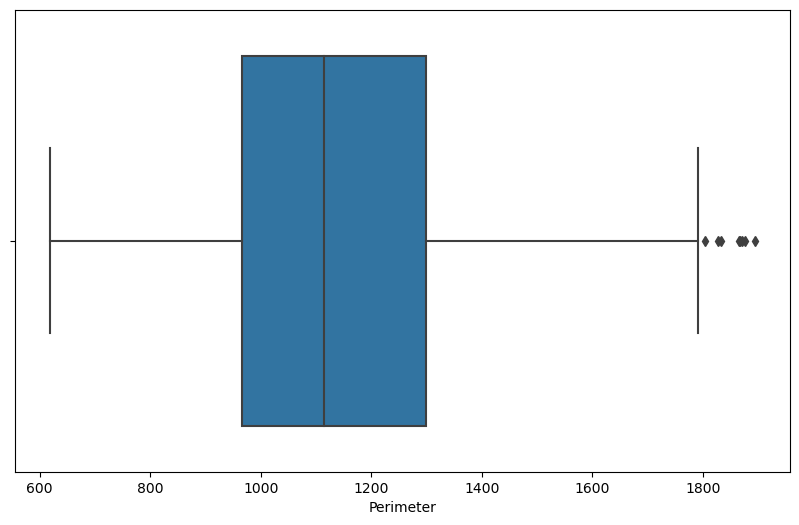

In [27]:
sns.boxplot(data =df, x='Perimeter');

In [28]:
df[df.Perimeter>2000]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


In [29]:
df = df[df.Perimeter<2000]

In [30]:
df.Class.value_counts()

Kecimen    436
Besni      431
Name: Class, dtype: int64

In [31]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

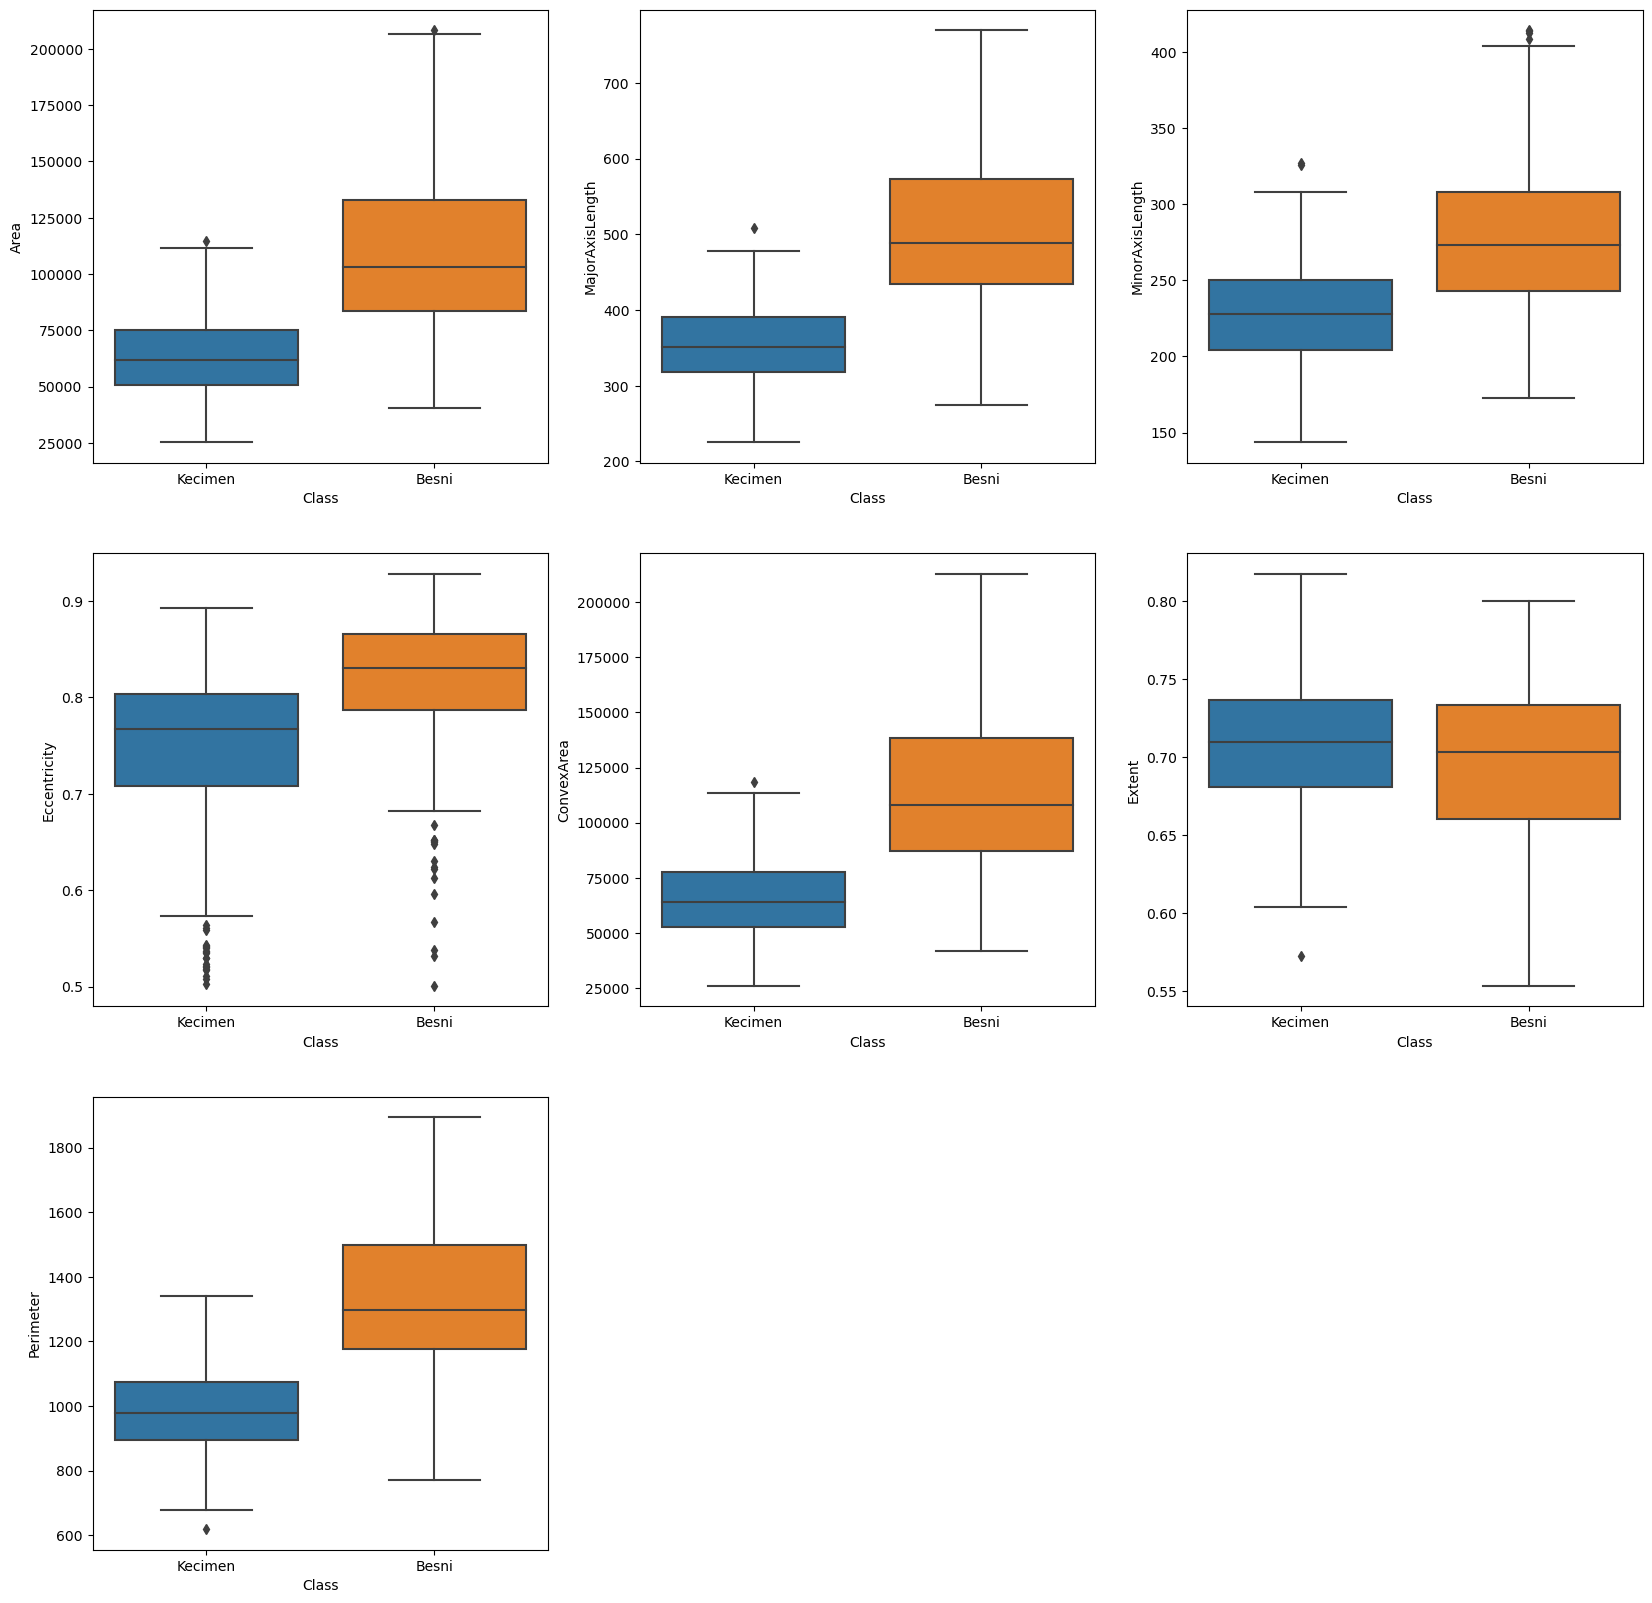

In [32]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()

In [33]:
df.Class.value_counts()

Kecimen    436
Besni      431
Name: Class, dtype: int64

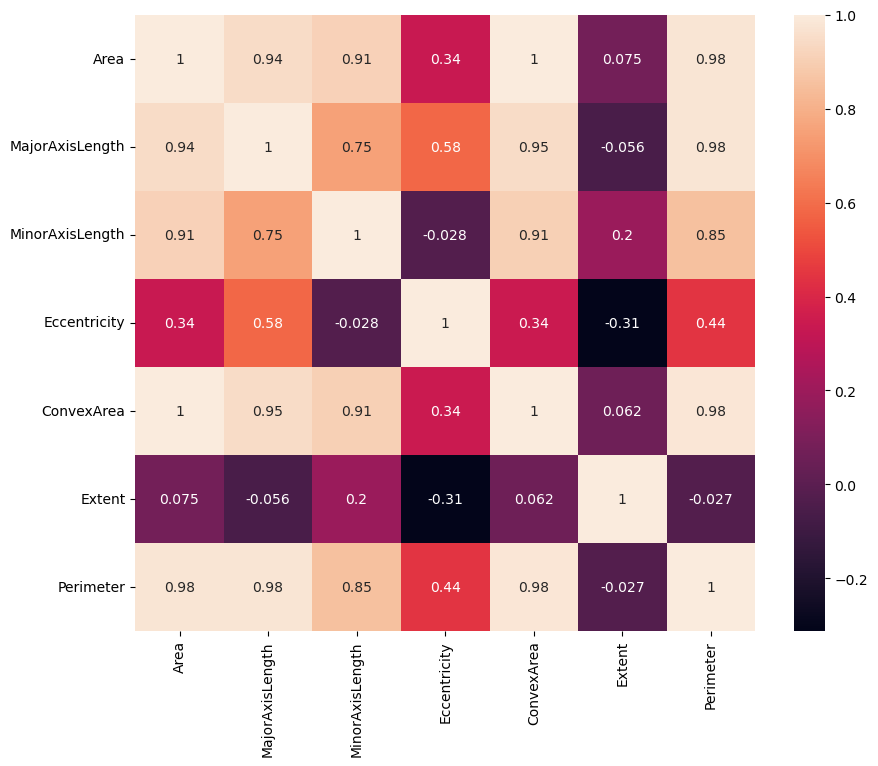

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True);

In [35]:
df.Class.value_counts()

Kecimen    436
Besni      431
Name: Class, dtype: int64

## Train | Test Split and Scaling

In [36]:
X = df.drop(["Class"], axis = 1)
y = df["Class"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state = 42)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_model = LogisticRegression()

In [44]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [45]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [46]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(20)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
775,88747,425.007,268.668,0.775,92317,0.761,1184.156,Besni,Besni,0.438
813,152611,663.133,297.418,0.894,158488,0.615,1755.968,Besni,Besni,0.000
815,117354,520.327,289.662,0.831,121057,0.712,1374.171,Besni,Besni,0.040
768,175247,713.017,316.398,0.896,179961,0.592,1739.277,Besni,Besni,0.000
201,61996,333.748,243.540,0.684,63641,0.673,958.627,Kecimen,Kecimen,0.915
121,52266,320.443,213.857,0.745,54116,0.684,923.190,Kecimen,Kecimen,0.922
278,42609,280.149,200.272,0.699,44944,0.673,840.167,Kecimen,Kecimen,0.965
205,74849,379.925,252.617,0.747,76154,0.735,1040.788,Kecimen,Kecimen,0.824
445,61200,323.174,246.288,0.647,64553,0.707,997.264,Kecimen,Kecimen,0.872
883,171264,609.643,359.225,0.808,174156,0.772,1592.095,Besni,Besni,0.005


## Model Performance

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Log_Model Eval Metric


In [49]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[74 12]
 [ 9 79]]
              precision    recall  f1-score   support

       Besni       0.89      0.86      0.88        86
     Kecimen       0.87      0.90      0.88        88

    accuracy                           0.88       174
   macro avg       0.88      0.88      0.88       174
weighted avg       0.88      0.88      0.88       174


Train_Set
[[291  54]
 [ 39 309]]
              precision    recall  f1-score   support

       Besni       0.88      0.84      0.86       345
     Kecimen       0.85      0.89      0.87       348

    accuracy                           0.87       693
   macro avg       0.87      0.87      0.87       693
weighted avg       0.87      0.87      0.87       693



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

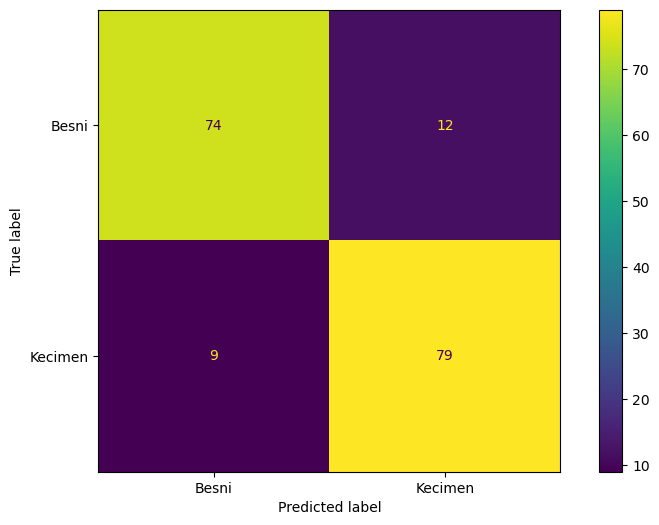

In [51]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.show()

### Cross Validate

In [52]:
from sklearn.model_selection import cross_validate

In [53]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy", 
                                                                   "precision_weighted",
                                                                  "recall_weighted",
                                                                  "f1_weighted"], cv = 10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.860
test_precision_weighted   0.864
test_recall_weighted      0.860
test_f1_weighted          0.860
dtype: float64

In [54]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [57]:
f1_Kecimen = make_scorer(f1_score, average = None, labels =["Kecimen"])
precision_Kecimen = make_scorer(precision_score, average = None, labels =["Kecimen"])
recall_Kecimen = make_scorer(recall_score, average = None, labels =["Kecimen"])

In [58]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_Kecimen":f1_Kecimen, 
                                                                   "precision_Kecimen":precision_Kecimen,
                                                                  "recall_Kecimen":recall_Kecimen}, cv = 10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_f1_Kecimen          0.864
test_precision_Kecimen   0.849
test_recall_Kecimen      0.883
dtype: float64

### GridSearchCV

In [59]:
model = LogisticRegression()

penalty = ["l2", "l1"]
C = np.logspace(-1, 5, 10) #katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]


param_grid = {"penalty": penalty,
             "C": C,
             "class_weight":class_weight,
             "solver": solver}

grid_model = GridSearchCV(estimator = model, 
                          param_grid = param_grid, 
                          cv = 10, scoring = "accuracy", 
                          n_jobs = -1)

In [60]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [61]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [62]:
grid_model.best_score_

nan

In [63]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
       'Besni', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', '

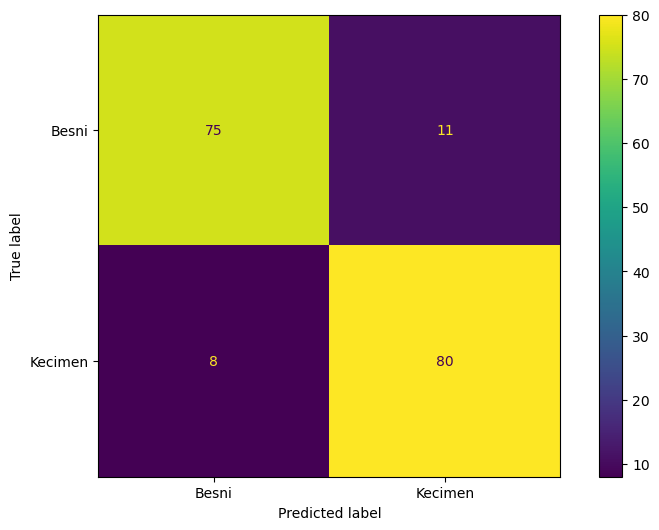

In [64]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test_scaled, y_test);

# Grid_Model Eval Metric

In [65]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 11]
 [ 8 80]]
              precision    recall  f1-score   support

       Besni       0.90      0.87      0.89        86
     Kecimen       0.88      0.91      0.89        88

    accuracy                           0.89       174
   macro avg       0.89      0.89      0.89       174
weighted avg       0.89      0.89      0.89       174


Train_Set
[[293  52]
 [ 42 306]]
              precision    recall  f1-score   support

       Besni       0.87      0.85      0.86       345
     Kecimen       0.85      0.88      0.87       348

    accuracy                           0.86       693
   macro avg       0.86      0.86      0.86       693
weighted avg       0.86      0.86      0.86       693



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [66]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

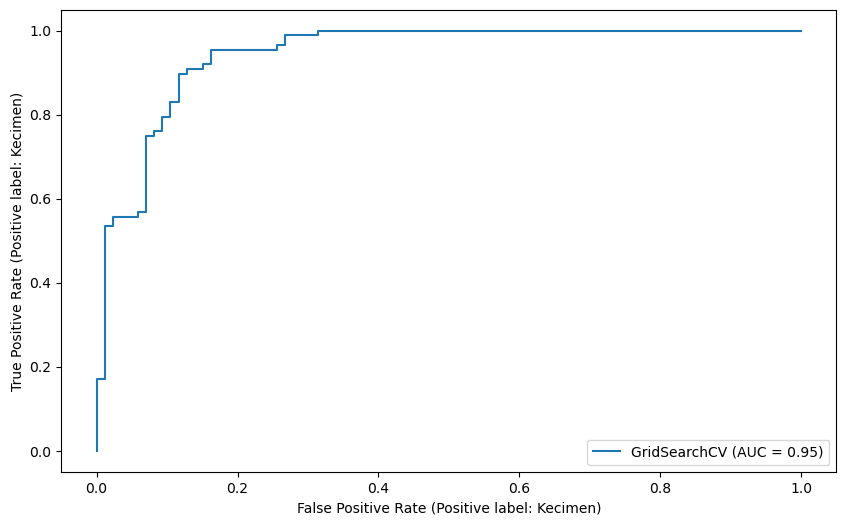

In [67]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test)

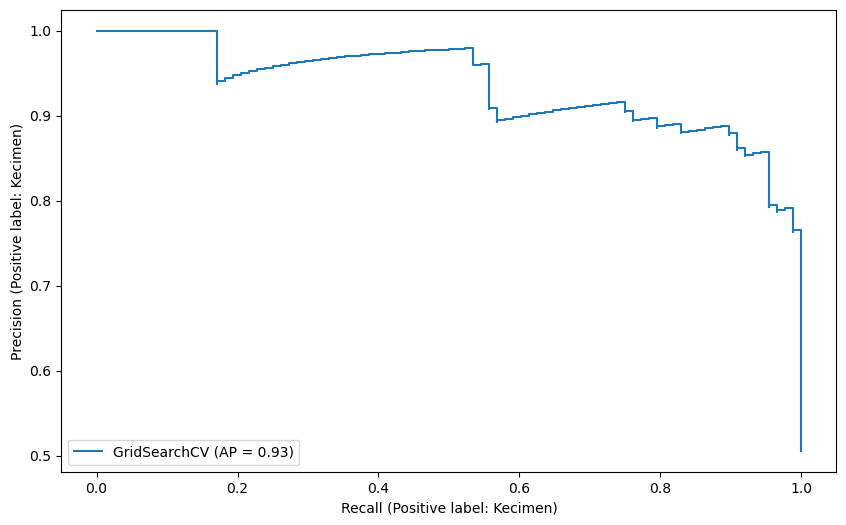

In [68]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test_scaled, y_test)

# Finding Best Treshold for max RECALL score

In [80]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:, 1])

0.9231051141096118

In [82]:
from sklearn.preprocessing import LabelBinarizer

#Etiketleri ikili forma dönüştürme
lb = LabelBinarizer()
y_train_binary = lb.fit_transform(y_train)

# ROC eğrisi değerlerini hesaplama
fp_rate, tp_rate, thresholds = roc_curve(y_train_binary, y_pred_proba[:, 1])

In [83]:
fp_tp_th = fp_rate, tp_rate, tresholds = roc_curve(y_train_binary, y_pred_proba[:, 1]) 
df_fp_tp_th = pd.DataFrame(fp_tp_th)
df_fp_tp_th

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000,0.000,0.000,0.003,0.003,0.006,0.006,0.009,0.009,0.012,...,0.371,0.377,0.377,0.400,0.400,0.507,0.507,0.583,0.583,1.000
1,0.000,0.003,0.055,0.055,0.078,0.078,0.141,0.141,0.201,0.201,...,0.986,0.986,0.991,0.991,0.994,0.994,0.997,0.997,1.000,1.000
2,1.997,0.997,0.979,0.979,0.976,0.975,0.959,0.957,0.937,0.936,...,0.222,0.216,0.215,0.201,0.196,0.129,0.128,0.070,0.068,0.000


In [84]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_treshold = tresholds[optimal_idx]
optimal_treshold

0.4956266899816708

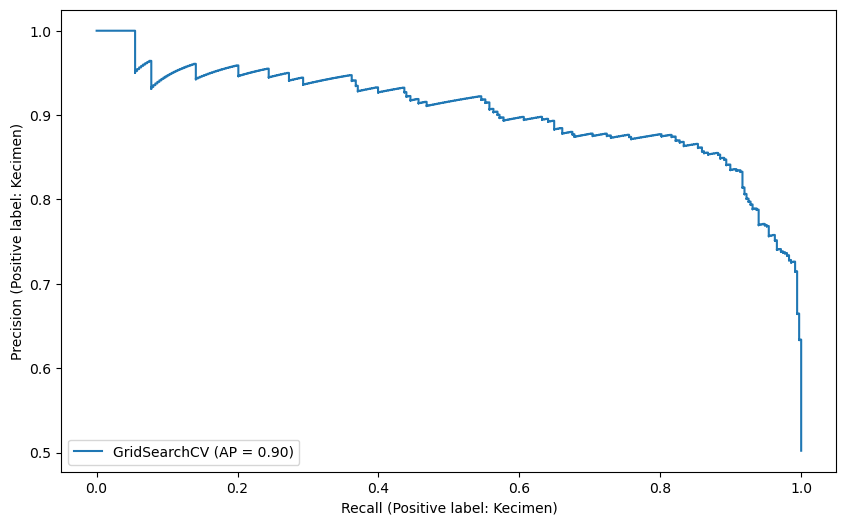

In [70]:
PrecisionRecallDisplay.from_estimator(grid_model, X_train_scaled, y_train)

In [85]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train_binary, y_pred_proba[:, 1])

0.9039865564890206

In [86]:
precisions, recalls, thresholds = precision_recall_curve(y_train_binary, y_pred_proba[:, 1])

In [87]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls)) #buda formülü aslında f1 skorun formülü
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.44561995640634994

In [88]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
y_pred_categorical = pd.Series(y_pred2).apply(lambda x: 'Besni' if x == 0 else 'Kecimen')

# Confusion matrix ve classification report hesaplama
print(confusion_matrix(y_test, y_pred_categorical))
print(classification_report(y_test, y_pred_categorical))

[[72 14]
 [ 6 82]]
              precision    recall  f1-score   support

       Besni       0.92      0.84      0.88        86
     Kecimen       0.85      0.93      0.89        88

    accuracy                           0.89       174
   macro avg       0.89      0.88      0.88       174
weighted avg       0.89      0.89      0.88       174



In [89]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
from sklearn.model_selection import StratifiedKFold
from ipywidgets import interactive, FloatSlider
from IPython.display import display

from sklearn.preprocessing import LabelBinarizer
from IPython.display import display


def generate_confusion_matrix(threshold):
    y_pred_proba = grid_model.predict_proba(X_test_scaled)
    y_pred_binary = (y_pred_proba[:, -1] >= threshold).astype(int)
    y_pred_categorical = lb.inverse_transform(y_pred_binary)  # y_pred'i kategorik hale getirme
    cm = confusion_matrix(y_test, y_pred_categorical)
    # Calculate metrics
    precision = precision_score(y_test, y_pred_categorical, average='weighted')  # average='weighted' kullanarak çok sınıflı hedefler için ortalama hassasiyeti alırız
    recall = recall_score(y_test, y_pred_categorical, average='weighted')  # average='weighted' kullanarak çok sınıflı hedefler için ortalama geri çağırma alırız
    accuracy = accuracy_score(y_test, y_pred_categorical)
    f1 = f1_score(y_test, y_pred_categorical, average='weighted')  # average='weighted' kullanarak çok sınıflı hedefler için ortalama F1 skorunu alırız
    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Threshold = {threshold:.2f})')
    # Add text below the graph
    plt.text(0.5, -0.20, f'Precision: {precision:.2f}\nRecall: {recall:.2f}\nAccuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}',
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.show()

# Create interactive slider
threshold_slider = FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01, description='Threshold')
# Create interactive widget
interactive_plot = interactive(generate_confusion_matrix, threshold=threshold_slider)
# Display the interactive widget
display(interactive_plot)


interactive(children=(FloatSlider(value=0.5, description='Threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [99]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    for train_index, test_index in skf.split(X, y):
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 'Kecimen' if x >= optimal_threshold else 'Besni')
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label='Kecimen'))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label='Kecimen'))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label='Kecimen'))
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [100]:
model = LogisticRegression(C = 0.1, class_weight = "balanced", penalty = "l2", solver = "lbfgs")
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      86.73%  std 1.65%
Precision-1   83.55%  std 1.96%
Recall-1      91.68%  std 1.96%
F1_score-1    87.41%  std 1.49%


# final model


In [185]:
scaler = StandardScaler().fit(X)

In [188]:
import pickle
pickle.dump(scaler, open("grape_scaler", "wb"))

In [189]:
X_scaled = scaler.transform(X)

In [309]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [310]:
final_model = LogisticRegression(C=0.1, penalty = "l2", class_weight= 'balanced', solver='lbfgs').fit(X_scaled, y)

In [311]:
pickle.dump(final_model, open("final_model_grape", "wb"))

# New data

In [312]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,867.000,86628.228,36995.896,25387.000,59486.500,78352.000,104368.500,208264.000
MajorAxisLength,867.000,426.955,106.996,225.630,346.000,406.691,487.953,769.425
MinorAxisLength,867.000,253.238,48.208,143.711,218.617,247.690,278.303,414.188
Eccentricity,867.000,0.784,0.081,0.501,0.743,0.798,0.841,0.928
ConvexArea,867.000,89706.547,37949.966,26139.000,61614.000,81325.000,107987.500,212813.000
Extent,867.000,0.702,0.046,0.553,0.673,0.707,0.734,0.817
Perimeter,867.000,1155.238,250.505,619.074,966.626,1114.736,1298.163,1893.414


In [313]:
my_dict = {"Area": [40340,78352, 178352],
           "MajorAxisLength": [250, 406, 600],
           "MinorAxisLength": [200, 240, 300],
           "Eccentricity": [0.6, 0.7, 0.8],
            "ConvexArea": [60000, 80000, 100000],
           "Extent": [0.65, 0.70, 0.75],
           "Perimeter": [800, 900, 1200]
            }

In [314]:
sample = pd.DataFrame(my_dict)
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,40340,250,200,0.600,60000,0.650,800
1,78352,406,240,0.700,80000,0.700,900
2,178352,600,300,0.800,100000,0.750,1200


In [315]:
scaler_grape = pickle.load(open("grape_scaler", "rb"))

In [316]:
sample_scaled = scaler_grape.transform(sample)

In [320]:
sample_scaled

array([[-1.25189415, -1.65480113, -1.10498682, -2.27290946, -0.78323373,
        -1.11679275, -1.41890506],
       [-0.22383578, -0.19595789, -0.27476633, -1.03661559, -0.25591984,
        -0.03499582, -1.01948141],
       [ 2.48072691,  1.61824459,  0.97056441,  0.19967829,  0.27139404,
         1.04680111,  0.17878955]])

# Kaydettiğini modeli çağır ve yeni gözlemi predict yap

In [317]:
final_model = pickle.load(open("final_model_grape", "rb"))

In [321]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
#prediction2 = [1 if i>= optimal_treshold else 0 for i in predictions_proba[:,1]]


In [323]:
#sample['pred_proba'] = predictions_proba[:,1]
#sample["pred"] = predictions
#sample["pred_0.48"] = prediction2
#sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred,pred_proba_kecimen,pred_proba_besni,pred_proba,pred_0.48
0,40340,250,200,0.600,60000,0.650,800,Kecimen,0.020,0.980,0.980,1
1,78352,406,240,0.700,80000,0.700,900,Kecimen,0.178,0.822,0.822,1
2,178352,600,300,0.800,100000,0.750,1200,Besni,0.933,0.067,0.067,0


In [319]:
sample["pred"] = predictions
sample["pred_proba_kecimen"] = predictions_proba[:,0]
sample["pred_proba_besni"] = predictions_proba[:,1]
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred,pred_proba_kecimen,pred_proba_besni
0,40340,250,200,0.600,60000,0.650,800,Kecimen,0.020,0.980
1,78352,406,240,0.700,80000,0.700,900,Kecimen,0.178,0.822
2,178352,600,300,0.800,100000,0.750,1200,Besni,0.933,0.067


# Conclusion 

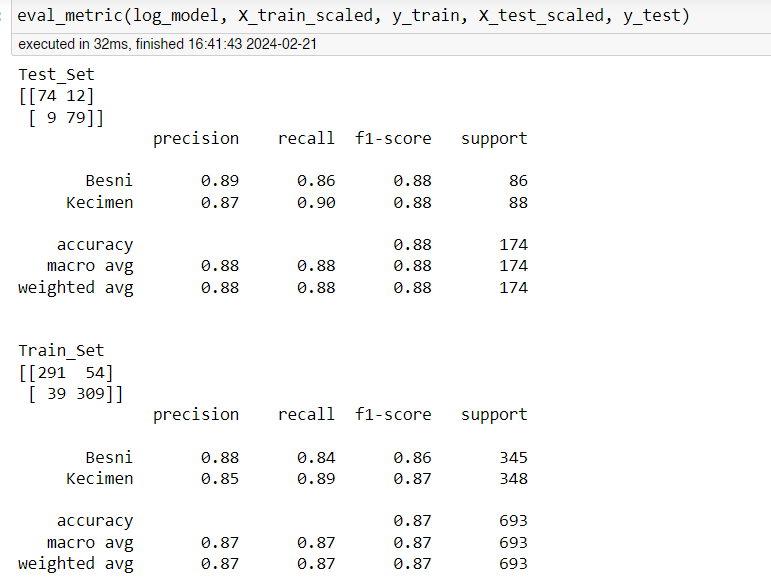

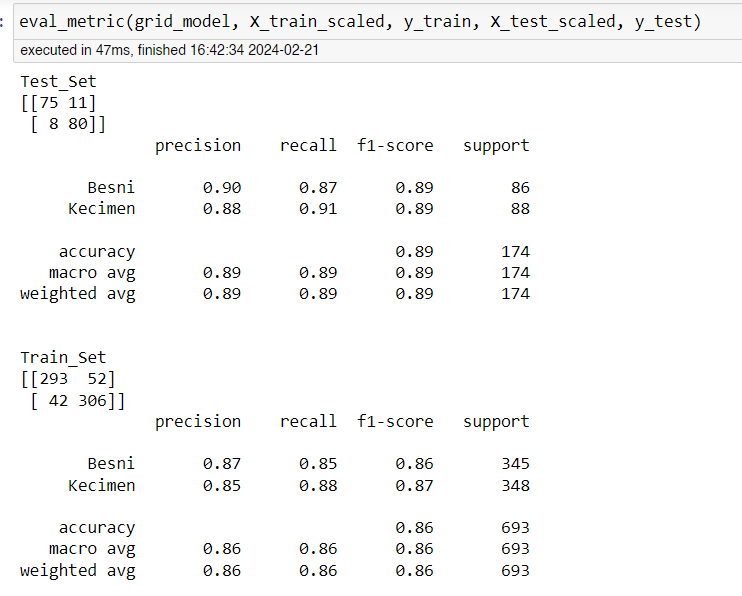

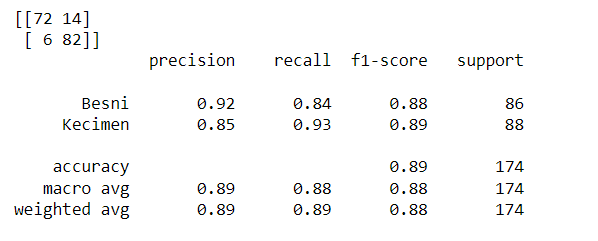